## Data structures for geospatial time series data



In [ ]:
import contextily as cx
import matplotlib.pyplot as plt
import osmnx as ox
import seaborn as sns
import xarray as xr

from meteora import utils
from meteora.clients import METARASOSIEMClient

In [ ]:
region = "Switzerland"
start = "2021-08-13"
end = "2021-08-16"
variables = ["temperature", "precipitation", "wind_speed"]

In [ ]:
client = METARASOSIEMClient(region)

In [ ]:
ts_df = client.get_ts_df(variables, start=start, end=end)
ts_df

temperature  precipitation  wind_speed
station_id time                                                       
LSGC       2021-08-13 00:20:00         60.8            0.0         1.0
           2021-08-13 00:50:00         60.8            0.0         2.0
           2021-08-13 01:20:00         60.8            0.0         2.0
           2021-08-13 01:50:00         59.0            0.0         0.0
           2021-08-13 02:20:00         59.0            0.0         0.0
...                                     ...            ...         ...
LSZS       2021-08-15 21:50:00         51.8            0.0         4.0
           2021-08-15 22:20:00         51.8            0.0         2.0
           2021-08-15 22:50:00         51.8            0.0         4.0
           2021-08-15 23:20:00         50.0            0.0         2.0
           2021-08-15 23:50:00         50.0            0.0         1.0

[2304 rows x 3 columns]

There are different ways in which we can structure time series data frame shown above. The most common representation are the so-called long and wide table formats (see the ["Data structures accepted by seaborn"](https://seaborn.pydata.org/tutorial/data_structure.html) section of the seaborn documentation for an overview).

### Long data frames

The `get_ts_df` method returns a long data frame where the station and time are used as multi-index levels, so that we can easily select the time series of a specific station:

In [ ]:
station_id = "LSGG"
ts_df.loc[station_id]

,temperature,precipitation,wind_speed
time,,,
2021-08-13 00:20:00,64.4,0.0,4.0
2021-08-13 00:50:00,62.6,0.0,1.0
2021-08-13 01:20:00,62.6,0.0,3.0
2021-08-13 01:50:00,62.6,0.0,2.0
2021-08-13 02:20:00,62.6,0.0,3.0
...,...,...,...
2021-08-15 21:50:00,77.0,0.0,2.0
2021-08-15 22:20:00,77.0,0.0,4.0
2021-08-15 22:50:00,77.0,0.0,10.0


The key advantage of a long data frame for time series data is that it is very flexible, i.e., we can combine stations with different time ranges and temporal resolutions into a single data frame structure. However, performing simple time series operations requires grouping by stations, which may not be the most convenient and straight-forward.

### Wide data frames

The same data can be represented as a wide data frame, where the index is the time and the variables and stations are the multi-level columns. We can convert the long data frame to a wide data frame using the `meteora.utils.long_to_wide` function:

In [ ]:
# in this case, equivalently:
# wide_ts_df = ts_df.unstack(level="station")
wide_ts_df = utils.long_to_wide(ts_df)
wide_ts_df

variable            temperature                                            \
station_id                 LSGC  LSGG  LSGS  LSMA  LSMD  LSME  LSMM  LSMP   
time                                                                        
2021-08-13 00:20:00        60.8  64.4  64.4  69.8  68.0  69.8  66.2  68.0   
2021-08-13 00:50:00        60.8  62.6  64.4  68.0  66.2  69.8  66.2  68.0   
2021-08-13 01:20:00        60.8  62.6  64.4  66.2  60.8  68.0  64.4  68.0   
2021-08-13 01:50:00        59.0  62.6  62.6  66.2  59.0  66.2  64.4  66.2   
2021-08-13 02:20:00        59.0  62.6  62.6  64.4  59.0  64.4  62.6  64.4   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
2021-08-15 21:50:00        62.6  77.0  75.2  73.4  -4.0  75.2  69.8  71.6   
2021-08-15 22:20:00        64.4  77.0  75.2  71.6  12.2  73.4  68.0  71.6   
2021-08-15 22:50:00        66.2  77.0  75.2  69.8 -13.0  71.6  68.0  71.6   
2021-08-15 23:20:00        64.4  68.0  75.2  71.6  26.6  71.6  68.0  75.2   
2021-08-15 23:50:00        66.2  68.0  71.6  73.4  23.0  71.6  68.0  69.8   

variable                         ... wind_speed                            \
station_id           LSZA  LSZB  ...       LSMM LSMP LSZA LSZB  LSZC LSZG   
time                             ...                                        
2021-08-13 00:20:00  71.6  64.4  ...        2.0  4.0  8.0  3.0   4.0  2.0   
2021-08-13 00:50:00  71.6  62.6  ...        3.0  4.0  4.0  3.0   2.0  2.0   
2021-08-13 01:20:00  71.6  62.6  ...        4.0  3.0  2.0  1.0   2.0  2.0   
2021-08-13 01:50:00  69.8  62.6  ...        3.0  3.0  3.0  2.0   4.0  2.0   
2021-08-13 02:20:00  69.8  62.6  ...        3.0  0.0  4.0  2.0   3.0  2.0   
...                   ...   ...  ...        ...  ...  ...  ...   ...  ...   
2021-08-15 21:50:00  75.2  68.0  ...        0.0  1.0  1.0  1.0   2.0  1.0   
2021-08-15 22:20:00  75.2  66.2  ...        3.0  0.0  2.0  2.0   9.0  4.0   
2021-08-15 22:50:00  73.4  66.2  ...        6.0  2.0  2.0  2.0  15.0  3.0   
2021-08-15 23:20:00  75.2  66.2  ...        3.0  3.0  3.0  4.0   9.0  3.0   
2021-08-15 23:50:00  73.4  68.0  ...        1.0  2.0  1.0  2.0   8.0  5.0   

variable                                 
station_id          LSZH LSZL LSZR LSZS  
time                                     
2021-08-13 00:20:00  7.0  5.0  6.0  1.0  
2021-08-13 00:50:00  4.0  7.0  3.0  4.0  
2021-08-13 01:20:00  5.0  8.0  6.0  2.0  
2021-08-13 01:50:00  2.0  7.0  5.0  2.0  
2021-08-13 02:20:00  4.0  3.0  4.0  1.0  
...                  ...  ...  ...  ...  
2021-08-15 21:50:00  2.0  3.0  2.0  4.0  
2021-08-15 22:20:00  2.0  2.0  4.0  2.0  
2021-08-15 22:50:00  2.0  2.0  5.0  4.0  
2021-08-15 23:20:00  2.0  2.0  5.0  2.0  
2021-08-15 23:50:00  2.0  3.0  3.0  1.0  

[144 rows x 48 columns]

Accordingly, we can easily select the time series of a specific variable:

In [ ]:
wide_ts_df["temperature"]

station_id,LSGC,LSGG,LSGS,LSMA,LSMD,LSME,LSMM,LSMP,LSZA,LSZB,LSZC,LSZG,LSZH,LSZL,LSZR,LSZS
time,,,,,,,,,,,,,,,,
2021-08-13 00:20:00,60.8,64.4,64.4,69.8,68.0,69.8,66.2,68.0,71.6,64.4,68.0,68.0,71.6,71.6,71.6,50.0
2021-08-13 00:50:00,60.8,62.6,64.4,68.0,66.2,69.8,66.2,68.0,71.6,62.6,69.8,66.2,71.6,73.4,71.6,50.0
2021-08-13 01:20:00,60.8,62.6,64.4,66.2,60.8,68.0,64.4,68.0,71.6,62.6,68.0,66.2,69.8,73.4,73.4,50.0
2021-08-13 01:50:00,59.0,62.6,62.6,66.2,59.0,66.2,64.4,66.2,69.8,62.6,66.2,64.4,69.8,73.4,69.8,50.0
2021-08-13 02:20:00,59.0,62.6,62.6,64.4,59.0,64.4,62.6,64.4,69.8,62.6,68.0,62.6,69.8,73.4,71.6,48.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-15 21:50:00,62.6,77.0,75.2,73.4,-4.0,75.2,69.8,71.6,75.2,68.0,73.4,71.6,71.6,73.4,73.4,51.8
2021-08-15 22:20:00,64.4,77.0,75.2,71.6,12.2,73.4,68.0,71.6,75.2,66.2,73.4,71.6,69.8,73.4,77.0,51.8
2021-08-15 22:50:00,66.2,77.0,75.2,69.8,-13.0,71.6,68.0,71.6,73.4,66.2,71.6,69.8,69.8,73.4,78.8,51.8


Note that unlike in the long data frame, the records of all the stations and variables are indexed by a common and unique timestamp. Accordingly, a key advantage of the wide data frame is that time series operations are supported by pandas out-of-the-box. For example, we can easily select a time range and plot the temperature time series of all stations:

<Axes: xlabel='time'>

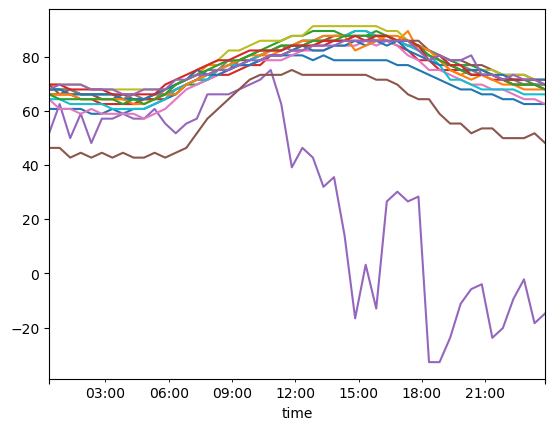

In [ ]:
wide_ts_df.loc["2021-08-14 00:00:00":"2021-08-15 00:00:00"]["temperature"].plot(
    legend=False
)

We can also resample the time series to a different frequency, e.g., we can compute the hourly mean temperature time series of all stations:

<Axes: xlabel='time'>

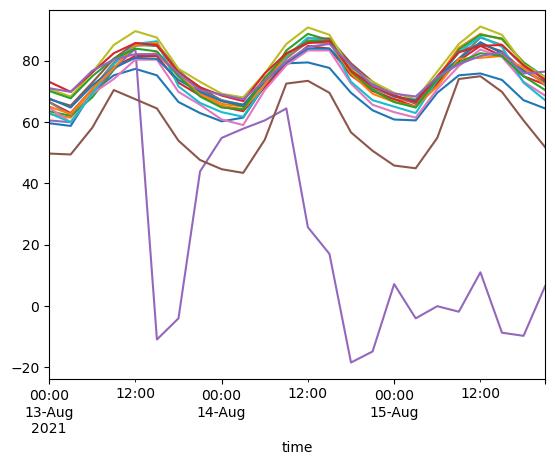

In [ ]:
wide_ts_df.resample("3h")["temperature"].mean().plot(legend=False)

The main disadvantage is the wide data form may not be appropriate to store raw observations from different sources at different time resolutions, since it can result in many nan values.

### Example geospatial operations with long and wide data frames

We have so far reviewed the advantages and disatvantages that the long and wide data frame forms feature when dealing with time series data. However, meteorological observations also have an important geospatial component which we have not addressed yet. While it is possible to add a "geometry" column to the long data frame, it would result in many repeated values (since we likely have many observations for each station). On the other hand, stations are featured as rows in the wide data frame, which makes adding their geolocation very inconvenient.

Therefore, in most cases the best way to peform spatial operations on meteorological data is to use two separate data structures, i.e., one for the time series of measurements and another with the station locations (and potentially other attributes).
As shown above, the station locations can be accessed in the `stations_gdf` property, which we can use to perform geospatial operations. For example, we can select stations within a buffer around a specific location:

In [ ]:
query = "Canton de Vaud"
buffer_dist = 20e3  # in meters

extent_geom = (
    ox.projection.project_gdf(ox.geocode_to_gdf(query))
    .buffer(buffer_dist)
    .to_crs(client.stations_gdf.crs)
    .iloc[0]
)
station_ids = client.stations_gdf[client.stations_gdf.within(extent_geom)].index
station_ids

Index(['LSGC', 'LSGG', 'LSGS', 'LSMP'], dtype='object', name='station_id')

We can use this information to select the time series of the stations within the buffer. For the long data frame (the default in Meteora), this is straightforward since the stations are the first-level index:

In [ ]:
ts_df.loc[station_ids]

temperature  precipitation  wind_speed
station_id time                                                       
LSGC       2021-08-13 00:20:00         60.8            0.0         1.0
           2021-08-13 00:50:00         60.8            0.0         2.0
           2021-08-13 01:20:00         60.8            0.0         2.0
           2021-08-13 01:50:00         59.0            0.0         0.0
           2021-08-13 02:20:00         59.0            0.0         0.0
...                                     ...            ...         ...
LSMP       2021-08-15 21:50:00         71.6            0.0         1.0
           2021-08-15 22:20:00         71.6            0.0         0.0
           2021-08-15 22:50:00         71.6            0.0         2.0
           2021-08-15 23:20:00         75.2            0.0         3.0
           2021-08-15 23:50:00         69.8            0.0         2.0

[576 rows x 3 columns]

For the wide data frame, stations are in the second level of the columns, so we can either (i) swap the column levels and then simply pass `station_ids` to select the desired stations or (ii) use `.loc` at the second level of the columns:

In [ ]:
# (i)
# wide_ts_df.swaplevel("variable", "station", axis="columns")[station_ids]
# (ii)
wide_ts_df.loc[:, (slice(None), station_ids)]

variable            temperature                   precipitation            \
station_id                 LSGC  LSGG  LSGS  LSMP          LSGC LSGG LSGS   
time                                                                        
2021-08-13 00:20:00        60.8  64.4  64.4  68.0           0.0  0.0  0.0   
2021-08-13 00:50:00        60.8  62.6  64.4  68.0           0.0  0.0  0.0   
2021-08-13 01:20:00        60.8  62.6  64.4  68.0           0.0  0.0  0.0   
2021-08-13 01:50:00        59.0  62.6  62.6  66.2           0.0  0.0  0.0   
2021-08-13 02:20:00        59.0  62.6  62.6  64.4           0.0  0.0  0.0   
...                         ...   ...   ...   ...           ...  ...  ...   
2021-08-15 21:50:00        62.6  77.0  75.2  71.6           0.0  0.0  0.0   
2021-08-15 22:20:00        64.4  77.0  75.2  71.6           0.0  0.0  0.0   
2021-08-15 22:50:00        66.2  77.0  75.2  71.6           0.0  0.0  0.0   
2021-08-15 23:20:00        64.4  68.0  75.2  75.2           0.0  0.0  0.0   
2021-08-15 23:50:00        66.2  68.0  71.6  69.8           0.0  0.0  0.0   

variable                 wind_speed                  
station_id          LSMP       LSGC  LSGG LSGS LSMP  
time                                                 
2021-08-13 00:20:00  0.0        1.0   4.0  4.0  4.0  
2021-08-13 00:50:00  0.0        2.0   1.0  5.0  4.0  
2021-08-13 01:20:00  0.0        2.0   3.0  0.0  3.0  
2021-08-13 01:50:00  0.0        0.0   2.0  0.0  3.0  
2021-08-13 02:20:00  0.0        0.0   3.0  2.0  0.0  
...                  ...        ...   ...  ...  ...  
2021-08-15 21:50:00  0.0        1.0   2.0  3.0  1.0  
2021-08-15 22:20:00  0.0        2.0   4.0  3.0  0.0  
2021-08-15 22:50:00  0.0        5.0  10.0  3.0  2.0  
2021-08-15 23:20:00  0.0        6.0   7.0  5.0  3.0  
2021-08-15 23:50:00  0.0        6.0   3.0  1.0  2.0  

[144 rows x 12 columns]

Note that if we are interested in a single variable, filtering by stations becomes much simpler:

In [ ]:
wide_ts_df["temperature"][station_ids]

station_id,LSGC,LSGG,LSGS,LSMP
time,,,,
2021-08-13 00:20:00,60.8,64.4,64.4,68.0
2021-08-13 00:50:00,60.8,62.6,64.4,68.0
2021-08-13 01:20:00,60.8,62.6,64.4,68.0
2021-08-13 01:50:00,59.0,62.6,62.6,66.2
2021-08-13 02:20:00,59.0,62.6,62.6,64.4
...,...,...,...,...
2021-08-15 21:50:00,62.6,77.0,75.2,71.6
2021-08-15 22:20:00,64.4,77.0,75.2,71.6
2021-08-15 22:50:00,66.2,77.0,75.2,71.6


### Vector data cubes

As reviewed above, long and wide data frame forms have its own strengths and weaknesses when dealing with time series data, yet none of the forms offers a single object to encapsulate both the temporal and geospatial aspects of meteorological stations' data. Luckily for us, there exists a data structure that fulfills our requirements - enter *vector data cubes*.

A *vector data cube* is an n-D array with at least one dimension indexed by vector geometries [1]. In Python, this is represented as an [xarray](https://xarray.dev) Dataset (or DataArray) object with an indexed dimension with vector geometries set using [xvec](https://xvec.readthedocs.io). Given the time series data frame and station locations, we can get a vector data cube using the `meteora.utils.long_to_cube` function:

In [ ]:
ts_cube = utils.long_to_cube(ts_df, client.stations_gdf)
ts_cube

<xarray.Dataset> Size: 57kB
Dimensions:        (geometry: 16, time: 144)
Coordinates:
  * time           (time) datetime64[ns] 1kB 2021-08-13T00:20:00 ... 2021-08-...
  * geometry       (geometry) object 128B POINT (6.7928 47.0838) ... POINT (9...
    station_id     (geometry) object 128B 'LSGC' 'LSGG' 'LSGS' ... 'LSZR' 'LSZS'
Data variables:
    temperature    (geometry, time) float64 18kB 60.8 60.8 60.8 ... 50.0 50.0
    precipitation  (geometry, time) float64 18kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    wind_speed     (geometry, time) float64 18kB 1.0 2.0 2.0 0.0 ... 4.0 2.0 1.0
Indexes:
    geometry  GeometryIndex (crs=EPSG:4326)

We obtain an xarray Dataset with both the temporal and geospatial (respectively labeled as "time" and "station_id" following `ts_df`) coordinates and the three variables as data variables. Additionally, note in the "Indexes" section that the "station" index have the geospatial features enabled by xvec (note the `GeometryIndex` with the CRS).

The major advantage of vector data cubes is that we can now natively perform both time series and geospatial operations using a single object:

In [ ]:
ts_cube["temperature"].sel(geometry=extent_geom, method="intersects").sel(
    time=slice("2021-08-13 12:00:00", "2021-08-14 12:00:00")
).resample(time="3h").mean()

<xarray.DataArray 'temperature' (geometry: 4, time: 8)> Size: 256B
array([[85.1, 84.8, 76.4, 70.7, 67.1, 65. , 71.6, 83.3],
       [81.5, 82.4, 74.9, 69.5, 65.9, 65. , 74.6, 80.6],
       [84.8, 85.4, 77. , 70.1, 67.1, 65.6, 73.1, 80.9],
       [77.3, 75.2, 66.5, 62.9, 60.2, 61.4, 71.9, 79.1]])
Coordinates:
  * geometry    (geometry) object 32B POINT (7.3303 46.2186) ... POINT (6.792...
    station_id  (geometry) object 32B 'LSGS' 'LSGG' 'LSMP' 'LSGC'
  * time        (time) datetime64[ns] 64B 2021-08-13T12:00:00 ... 2021-08-14T...
Indexes:
    geometry  GeometryIndex (crs=EPSG:4326)

We can also use the xvec accessor to plot our results, both in terms of time series data:

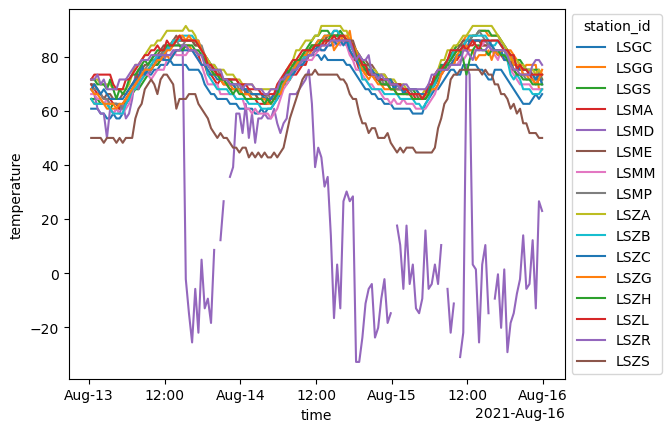

In [ ]:
# assign_coords(station=ts_df.index.get_level_values("station").unique())
fig, ax = plt.subplots()
ts_cube["temperature"].plot.line(x="time", hue="station_id", add_legend=True, ax=ax)
sns.move_legend(ax, loc="center left", bbox_to_anchor=(1, 0.5))

or including geospatial information as well, e.g., stations colored by temperature averaged over a given period:

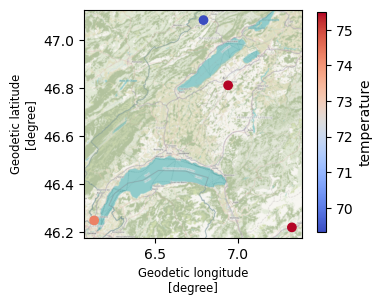

In [ ]:
fig, ax = (
    ts_cube["temperature"]
    .sel(geometry=extent_geom, method="intersects")
    .sel(time=slice("2021-08-13 12:00:00", "2021-08-14 12:00:00"))
    .mean("time")
    .xvec.plot(cmap="coolwarm", geometry="geometry")
)
cx.add_basemap(ax, crs=ts_cube.geometry.crs, attribution=False)

*(C) OpenStreetMap contributors, Tiles style by Humanitarian OpenStreetMap Team hosted by OpenStreetMap France*

## Saving to disk

There are several ways in which we can store the geospatial time series data that we deal with when using Meteora.

### Using long or wide data frames

When using long and wide data frames, the most straight-forward solution is to separately save the stations geo-data frame and time series data frame to disk, e.g., using a geospatial file format for the former and a pandas data frame compatible format (CSV, JSON...) for the latter:

In [ ]:
ts_df.to_csv("ts-df.csv")
client.stations_gdf.to_file("stations.gpkg")

Note that for long data frames, it is possible to save a single object by adding the station attributes as columns, however note that in most cases this will be highly inefficient and result in many repeated values.

For large amounts of data, you may consider [tstore](https://github.com/ltelab/tstore), which is an interoperable specification based on [Apache Parquet](https://parquet.apache.org) and [GeoParquet](https://github.com/opengeospatial/geoparquet). (note that the API is still experimental). The [first tutorial](https://tstore.readthedocs.io/en/latest/tutorials/01-your-first-tstore.html) illustrates different ways in which long data frames from Meteora can be efficiently$^1$ stored while keeping the geospatial information.

### Using vector data cubes

There exist several ways of saving vector data cubes to disk, which include (see the [related section of the xvec documentation](https://xvec.readthedocs.io/en/stable/io.html) for more details):

 - *geospatial file formats*, which is essentially equivalent to transforming the vector data cube to a long data frame with the station attributes (including location), and thus has the exact same shortcomings in terms of the high degree of repetition.
 - *binary serialization formats* such as pickle and joblib, which have the advantage of allowing compression but may only work when read in a similar environment with similar package versions (therefore with restricted interoperability).
 - *CF conventions with netCDF or zarr*, which encode the geospatial information so that it is compatible with the xarray's formats such as netCDF and zarr.

Overall, the latter option is likely the most convenient. Let us try it (note that in order to run the cells below, we need to [install zarr](https://github.com/zarr-developers/zarr-python) which is not a Meteora - nor xvec - dependency):

In [ ]:
encoded = ts_cube.xvec.encode_cf()
# encoded.to_netcdf("geo-encoded.nc", mode="w")
encoded.to_zarr("geo-encoded.zarr", mode="w")

/home/martibosch/miniforge3/envs/meteora/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/home/martibosch/miniforge3/envs/meteora/lib/python3.12/site-packages/zarr/core/array.py:3989: UserWarning: The dtype `StringDType()` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  meta = AsyncArray._create_metadata_v3(
/home/martibosch/miniforge3/envs/meteora/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)
/home/martibosch/miniforge3/envs/meteora/lib/python3.12/s

We can now read back the saved zarr store from disk into a vector data cube:

In [ ]:
roundtripped = xr.open_zarr("geo-encoded.zarr").xvec.decode_cf()
roundtripped

/home/martibosch/miniforge3/envs/meteora/lib/python3.12/site-packages/zarr/codecs/vlen_utf8.py:44: UserWarning: The codec `vlen-utf8` is currently not part in the Zarr format 3 specification. It may not be supported by other zarr implementations and may change in the future.
  return cls(**configuration_parsed)


<xarray.Dataset> Size: 57kB
Dimensions:        (geometry: 16, time: 144)
Coordinates:
  * geometry       (geometry) object 128B POINT (6.7928 47.0838) ... POINT (9...
    station_id     (geometry) object 128B dask.array<chunksize=(16,), meta=np.ndarray>
  * time           (time) datetime64[ns] 1kB 2021-08-13T00:20:00 ... 2021-08-...
Data variables:
    temperature    (geometry, time) float64 18kB dask.array<chunksize=(16, 144), meta=np.ndarray>
    wind_speed     (geometry, time) float64 18kB dask.array<chunksize=(16, 144), meta=np.ndarray>
    precipitation  (geometry, time) float64 18kB dask.array<chunksize=(16, 144), meta=np.ndarray>
Indexes:
    geometry  GeometryIndex (crs=EPSG:4326)

which we can test to be identical to the original `ts_cube`.

In [ ]:
roundtripped.identical(ts_cube)

True

## Footnotes

1. See [a benchmark](https://tstore.readthedocs.io/en/latest/tutorials/02-benchmark.html) comparing tstore, netCDF and zarr in terms of resulting file sizes as well as reading and writing times.

## References

1. Pebesma, Edzer (2022). "Vector Data Cubes". r-spatial.org blog. https://r-spatial.org/r/2022/09/12/vdc.html